In [2]:
from datasets import load_dataset

# Load private dataset
#dataset = load_dataset("mikeriess/LM_Da_test_100_llama-3.3-70b-instruct")
#dataset = load_dataset("mikeriess/LM_Da_test_100_llama-3.1-405b-instruct-fp8")
dataset = load_dataset("mikeriess/LM_dialogues1")

In [3]:
# Convert to pandas and then to dictionary format
df = dataset['train'].to_pandas()
df.head()

,model,conversation_id,orig_messages,synthetic_messages,orig_message_count,synthetic_message_count,message_count_diff,orig_total_length,synthetic_total_length,orig_total_tokens,synthetic_total_tokens
0,meta-llama/Llama-3.1-405B-Instruct-FP8,176,"[{'order': 1, 'text': 'Hey. Er der en måde man...","[{'order': 1, 'text': 'Hej, jeg har et problem...",6,6,0,1642,282,304,282
1,meta-llama/Llama-3.1-405B-Instruct-FP8,400,"[{'order': 1, 'text': 'Inspireret af et andet ...","[{'order': 1, 'text': 'Hej, jeg har en stor sa...",6,6,0,1010,237,184,237
2,meta-llama/Llama-3.1-405B-Instruct-FP8,1012,"[{'order': 1, 'text': 'hej, jeg har sgu lige b...","[{'order': 1, 'text': 'Hej, jeg har et problem...",5,5,0,900,168,172,168
3,meta-llama/Llama-3.1-405B-Instruct-FP8,3661,"[{'order': 1, 'text': 'Bliver en mp3 fil dekod...","[{'order': 1, 'text': 'Hej, jeg har et problem...",3,3,0,928,93,175,93
4,meta-llama/Llama-3.1-405B-Instruct-FP8,6280,"[{'order': 1, 'text': 'Skal købe for et par ko...","[{'order': 1, 'text': 'Hej, jeg søger efter en...",4,4,0,405,93,77,93


In [4]:
print(df.loc[53]['synthetic_messages'])

[{'order': 1, 'text': 'Hej, jeg har fundet en annonce for et produkt til 7,9 pund på en engelsk hjemmeside, men jeg er ikke sikker på, hvordan jeg skal gå frem for at købe det og få det leveret til Danmark. Kan du hjælpe mig med det?', 'turn': 1, 'user': 1}
 {'order': 2, 'text': 'Ja, naturligvis! Først skal du tjekke, om hjemmesiden sender til Danmark. Du kan som regel finde den information under "Levering" eller "Forsendelse" på hjemmesiden. Hvis de gør, skal du også tjekke, hvilke leveringsmuligheder de tilbyder, og hvad de koster.', 'turn': 1, 'user': 2}]


# Inspect original vs synthetic messages

In [9]:
def inspect_conversation_pair(df, idx):
    """
    Display original and synthetic messages side by side for a given conversation index
    """
    orig = df.iloc[idx]['orig_messages']
    synth = df.iloc[idx]['synthetic_messages']
    
    print(f"Conversation #{idx}")
    print("=" * 100)
    print("\nOriginal Messages:")
    print("-" * 50)
    for msg in orig:
        print(f"Turn {msg['order']} (User {msg.get('user', 'N/A')}):")
        print(f"{msg['text']}\n")
    
    print("\nSynthetic Messages:")
    print("-" * 50)
    for msg in synth:
        print(f"Turn {msg['order']} (User {msg.get('user', 'N/A')}):")
        print(f"{msg['text']}\n")
    
    print("=" * 100)

# Example usage:
inspect_conversation_pair(df, 5)  # View first conversation


Conversation #5

Original Messages:
--------------------------------------------------
Turn 1 (User 139):
Efter Holgers gru-opvækkende historie om Jay der måske har forvredet anklen, trænger vi til en solstrålehistorie!
Derfor gi'r jeg Jer: Linni Meister! Indbegrebet af en bundsolid, hardworking og meget meget talentfuld sangerinde:
[URL]
Rart endeligt at høre en sangerinde der kan sit kram uden det skal gå op i udseende det hele.
/[PER]

Turn 2 (User 251):
som mick Ø ville sige PUUUUU HAAAAAAAAAAAAAAAAAAA

Turn 3 (User 5):
- og så kan hun også håndtere kokosnødder. Det er sandelig en kvinde med mange talenter.

Turn 4 (User 229):
syns faktisk hun har en griner nok stemme.. ik til det nummer, men tror godt hun ku lyde fedt på nogle ting..

Turn 5 (User 219):
Whaattt? Som Megl siger er hun sgu da totalt inde i tracket og knokler for at berige musikken. Hvorfor skal hun nu disses med at hun ikke er god til tracket? :lol: :lol: :lol:

Turn 6 (User 115):
Hahahaha! :D
Stuuur kunst.

Turn 7 

## Tokens

In [8]:
df.columns

Index(['model', 'conversation_id', 'orig_messages', 'synthetic_messages',
       'orig_message_count', 'synthetic_message_count', 'message_count_diff',
       'orig_total_length', 'synthetic_total_length', 'orig_total_tokens',
       'synthetic_total_tokens'],
      dtype='object')

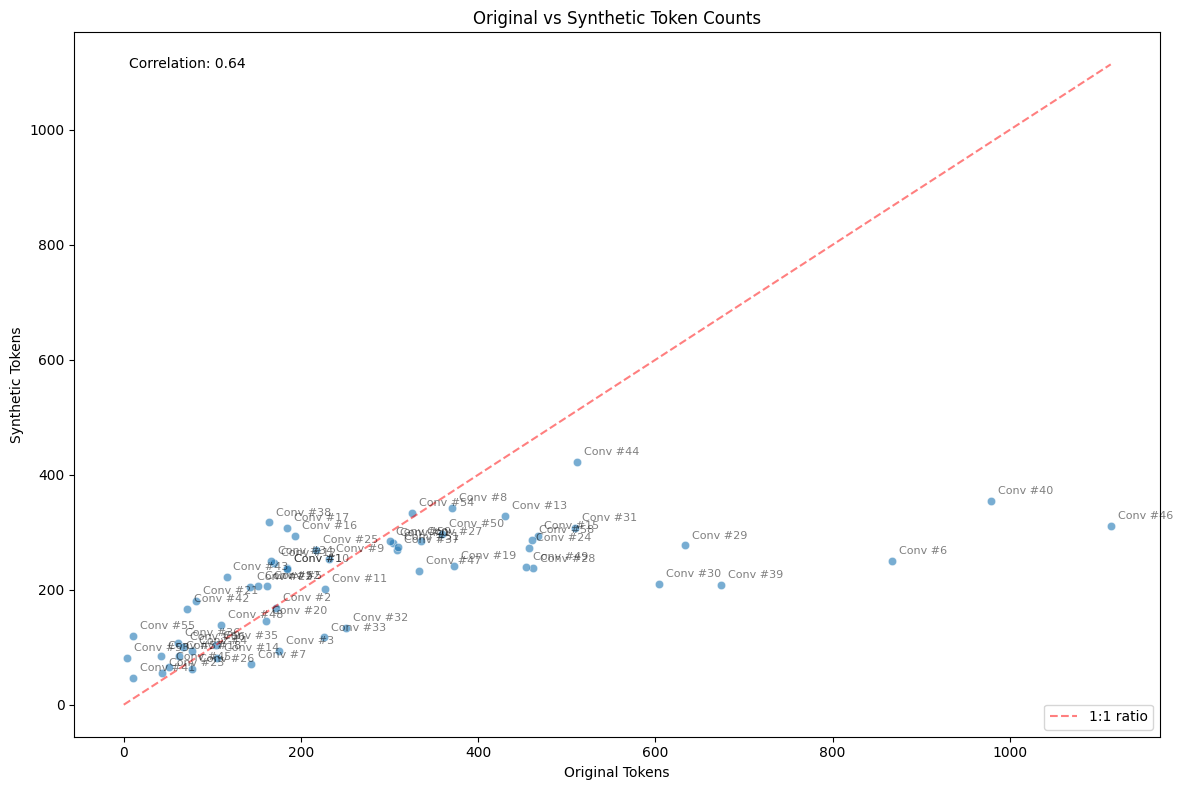


Token Count Statistics:
--------------------------------------------------
Average original tokens: 275.7
Average synthetic tokens: 209.9
Median original tokens: 188.5
Median synthetic tokens: 234.5

Correlation coefficient: 0.636


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, 
                x='orig_total_tokens', 
                y='synthetic_total_tokens',
                alpha=0.6)

# Add diagonal line representing y=x
max_tokens = max(df['orig_total_tokens'].max(), df['synthetic_total_tokens'].max())
plt.plot([0, max_tokens], [0, max_tokens], 'r--', alpha=0.5, label='1:1 ratio')

# Customize plot
plt.title('Original vs Synthetic Token Counts')
plt.xlabel('Original Tokens')
plt.ylabel('Synthetic Tokens')
plt.legend()

# Add correlation coefficient
correlation = df['orig_total_tokens'].corr(df['synthetic_total_tokens'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes)

# Optional: Add hover annotations
for idx, row in df.iterrows():
    plt.annotate(f'Conv #{idx}',
                (row['orig_total_tokens'], row['synthetic_total_tokens']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.5)

plt.tight_layout()
plt.show()

# Print some basic statistics
print("\nToken Count Statistics:")
print("-" * 50)
print(f"Average original tokens: {df['orig_total_tokens'].mean():.1f}")
print(f"Average synthetic tokens: {df['synthetic_total_tokens'].mean():.1f}")
print(f"Median original tokens: {df['orig_total_tokens'].median():.1f}")
print(f"Median synthetic tokens: {df['synthetic_total_tokens'].median():.1f}")
print(f"\nCorrelation coefficient: {correlation:.3f}")


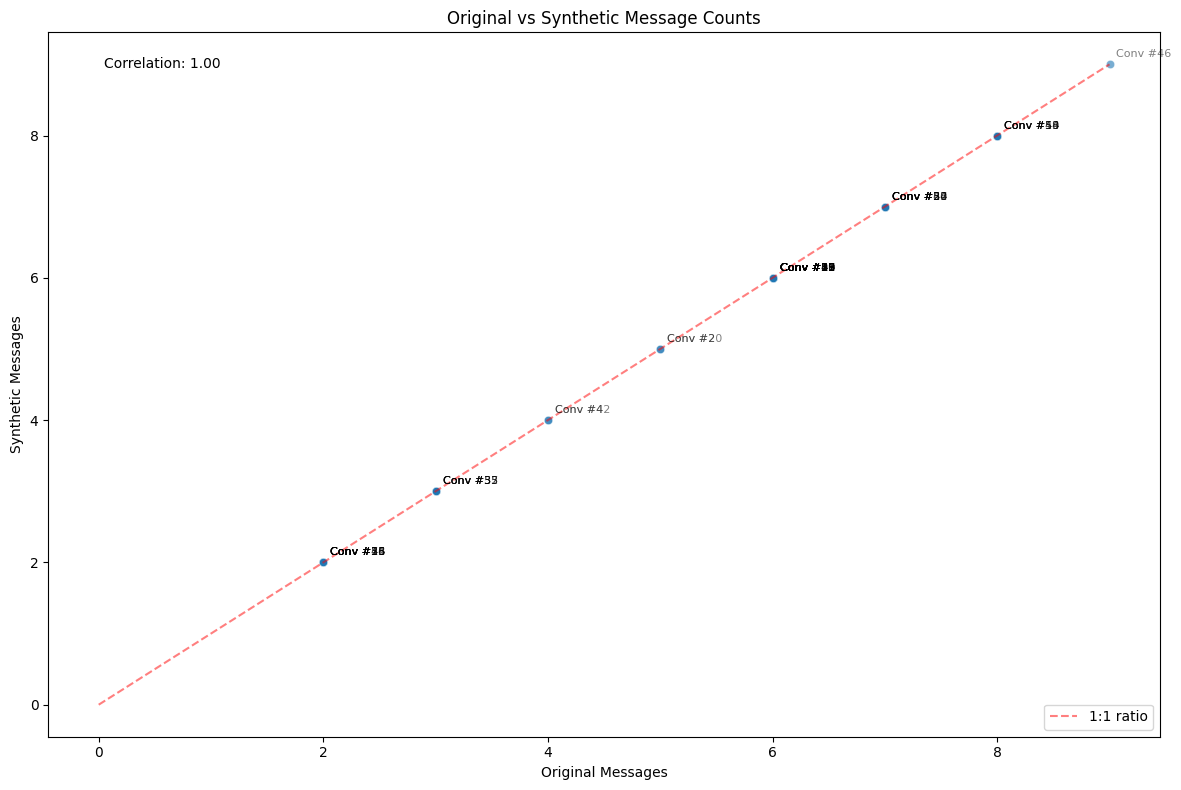


Message Count Statistics:
--------------------------------------------------
Average original messages: 5.3
Average synthetic messages: 5.3
Median original messages: 6.0
Median synthetic messages: 6.0

Correlation coefficient: 1.000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot for message counts
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, 
                x='orig_message_count', 
                y='synthetic_message_count',
                alpha=0.6)

# Add diagonal line representing y=x
max_count = max(df['orig_message_count'].max(), df['synthetic_message_count'].max())
plt.plot([0, max_count], [0, max_count], 'r--', alpha=0.5, label='1:1 ratio')

# Customize plot
plt.title('Original vs Synthetic Message Counts')
plt.xlabel('Original Messages')
plt.ylabel('Synthetic Messages')
plt.legend()

# Add correlation coefficient
correlation = df['orig_message_count'].corr(df['synthetic_message_count'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes)

# Optional: Add hover annotations
for idx, row in df.iterrows():
    plt.annotate(f'Conv #{idx}',
                (row['orig_message_count'], row['synthetic_message_count']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.5)

plt.tight_layout()
plt.show()

# Print some basic statistics
print("\nMessage Count Statistics:")
print("-" * 50)
print(f"Average original messages: {df['orig_message_count'].mean():.1f}")
print(f"Average synthetic messages: {df['synthetic_message_count'].mean():.1f}")
print(f"Median original messages: {df['orig_message_count'].median():.1f}")
print(f"Median synthetic messages: {df['synthetic_message_count'].median():.1f}")
print(f"\nCorrelation coefficient: {correlation:.3f}")

# Convert to ChatML format

In [4]:
# Convert dataset to pandas
df = dataset['train'].to_pandas()

# Group by question_id and concatenate conversations
chatml_data = {}
for idx, row in df.iterrows():
    # Create messages list
    messages = []
    for message in row['synthetic_messages']:
        # Determine role based on user field
        # Assuming user 1 is the questioner (user) and user 2 is the answerer (assistant)
        role = "user" if message['user'] == 1 else "assistant"
        
        messages.append({
            "role": role,
            "content": message['text']
        })
    
    # Generate a unique ID if question_id doesn't exist
    question_id = row.get('question_id', f"synthetic_{idx}")
    
    # Store in chatml format
    chatml_data[question_id] = {
        "messages": messages,
        "language": "Danish"  # Assuming all messages are in Danish
    }

# Print sample to verify format
print("Sample conversation:")
sample_id = list(chatml_data.keys())[0]
print(f"\nQuestion ID: {sample_id}")
print(f"Language: {chatml_data[sample_id]['language']}")
print("\nMessages:")
for msg in chatml_data[sample_id]['messages']:
    print(f"{msg['role']}: {msg['content']}\n")

Sample conversation:

Question ID: synthetic_0
Language: Danish

Messages:
user: Hej, jeg har et problem når jeg skal indspille vokal til en eksisterende indspilning af et band. Jeg har allerede lagt en masse effekter på instrumenterne, men når jeg skal indspille vokal, giver disse effekter en masse forsinkelse. Er der en måde at slå alle disse effekter fra på én gang, så jeg ikke skal gennemgå hver enkelt plug-in og slå dem fra manuelt?

assistant: Ja, det er et ret almindeligt problem! I de fleste DAW'er (digital audio workstation) kan du oprette en såkaldt "Bypass-gruppe" eller "Bypass-alle-effekter"-funktion. Dette giver dig mulighed for at slå alle effekter fra på én gang med et enkelt klik.

user: Det lyder fantastisk! Jeg bruger Logic Pro X - ved du hvordan jeg kan gøre det i denne DAW?

assistant: Ja, i Logic Pro X kan du gå til "Mix"-vinduet og klikke på "Bypass All Plug-ins" i toppen af vinduet. Dette vil slå alle effekter fra på alle spor i dit projekt. Du kan også oprette e

In [5]:
chatml_data

{'synthetic_0': {'messages': [{'role': 'user',
    'content': 'Hej, jeg har et problem når jeg skal indspille vokal til en eksisterende indspilning af et band. Jeg har allerede lagt en masse effekter på instrumenterne, men når jeg skal indspille vokal, giver disse effekter en masse forsinkelse. Er der en måde at slå alle disse effekter fra på én gang, så jeg ikke skal gennemgå hver enkelt plug-in og slå dem fra manuelt?'},
   {'role': 'assistant',
    'content': 'Ja, det er et ret almindeligt problem! I de fleste DAW\'er (digital audio workstation) kan du oprette en såkaldt "Bypass-gruppe" eller "Bypass-alle-effekter"-funktion. Dette giver dig mulighed for at slå alle effekter fra på én gang med et enkelt klik.'},
   {'role': 'user',
    'content': 'Det lyder fantastisk! Jeg bruger Logic Pro X - ved du hvordan jeg kan gøre det i denne DAW?'},
   {'role': 'assistant',
    'content': 'Ja, i Logic Pro X kan du gå til "Mix"-vinduet og klikke på "Bypass All Plug-ins" i toppen af vinduet. De

In [6]:

print("Sample conversation:")
sample_id = list(chatml_data.keys())[1]
print(f"\nQuestion ID: {sample_id}")
print(f"Language: {chatml_data[sample_id]['language']}")
print("\nMessages:")
for msg in chatml_data[sample_id]['messages']:
    #print(f"{msg['role']}: {msg['content'][:100]}...")
    print(f"{msg['role']}: {msg['content']}"+ "\n")

Sample conversation:

Question ID: synthetic_1
Language: Danish

Messages:
user: Hej, jeg har en stor samling af gamle vinyl-plader, som jeg gerne vil digitalisere, så jeg kan lytte til dem på min telefon eller computer. Er det muligt at overføre dem til en digital form, og hvordan gør jeg det i så fald?

assistant: Ja, det er absolut muligt! Du har flere muligheder. Du kan købe en USB-vinylafspiller, som kan tilsluttes din computer og overføre musikken direkte til en digital fil. Alternativt kan du også bruge en almindelig vinylafspiller og en lydkort til at indspille musikken på din computer.

user: En USB-vinylafspiller lyder som en god løsning. Er de dyre, og hvilke mærker kan du anbefale?

assistant: Priserne varierer, men du kan finde en god USB-vinylafspiller for mellem 500-1500 kroner. Mærker som Audio-Technica, Pro-Ject og U-Turn er alle godt kendte for deres kvalitet og pris. Du skal også være opmærksom på, at nogle af dem kommer med software, som kan hjælpe dig med at redige